

# Project: Investigate a Dataset no-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
<h4>This dataset collects information from 100k medical appointments in Brazil and focused on the question
of whether or not patients show up for their appointment. </h4>

we have a CSV file contains the dataset no-show appointments

We have a 14 columns as a factors like PatientId  , Neighbourhood , Gender , No-show , Hipertension ,  PatientId , Alcoholism  , Scholarship ,  Diabetes , Handcap and SMS received  
       

<h4>Questions to ask :What are the factors have an effect to a patient will attend for their scheduled appointment? </h4>


In [1]:
# Use this cell to set up import statements for all of the packages that you
#   plan to use.

import numpy as np
import pandas as pd 
from matplotlib import pyplot as plt
import seaborn as sns
%matplotlib inline

# Remember to include a 'magic word' so that your visualizations are plotted
#   inline with the notebook. See this page for more:
#   http://ipython.readthedocs.io/en/stable/interactive/magics.html

In [4]:
# Upgrade pandas to use dataframe.explode() function. 
!pip install --upgrade pandas==0.25.0

    100% |████████████████████████████████| 10.5MB 1.8MB/s eta 0:00:01  8% |██▋                             | 860kB 15.2MB/s eta 0:00:01    15% |████▉                           | 1.6MB 13.6MB/s eta 0:00:01    28% |█████████                       | 2.9MB 30.8MB/s eta 0:00:01    42% |█████████████▌                  | 4.4MB 31.3MB/s eta 0:00:01    49% |███████████████▊                | 5.1MB 18.0MB/s eta 0:00:01    56% |██████████████████              | 5.9MB 14.2MB/s eta 0:00:01    94% |██████████████████████████████▎ | 9.9MB 28.5MB/s eta 0:00:01
    100% |████████████████████████████████| 13.4MB 1.3MB/s eta 0:00:01 0% |                                | 20kB 12.0MB/s eta 0:00:02    3% |█▎                              | 512kB 14.1MB/s eta 0:00:01    17% |█████▊                          | 2.4MB 12.2MB/s eta 0:00:01    22% |███████▎                        | 3.0MB 13.0MB/s eta 0:00:01    31% |██████████▏                     | 4.2MB 8.4MB/s eta 0:00:02    36% |███████████▋                    

<a id='wrangling'></a>
## Data Wrangling

<h4>In this section of the report, you will load in the data, check for cleanliness, and then trim and clean your dataset for analysis.</h4>


In [2]:
# Load your data and print out a few lines. Perform operations to inspect data
#   types and look for instances of missing or possibly errant data.

#read data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")

In [3]:
#show first five rows of dataset
df.head()


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
# show the shape of dataset 
df.shape

(110527, 14)

dataset have 110527 rows as appointments and 14 columns that have patient data

In [5]:
# show how many duplication in the rows
sum(df.duplicated())

0

There is no duplication in the rows  

In [6]:
# check if there is a missing values 
pd.isna(df).sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There is no missing values in dataset

In [7]:
# get the unique numbers of ID 
df.loc[:, 'PatientId'].nunique()

62299

There is a unique 62299 ID  

In [8]:
#show how many duplicated in id column
duplicated_id = df["PatientId"].duplicated().sum()
print(duplicated_id)

48228


there is a 48228 duplicated row in the ID column

In [9]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Mean age : 37 years <br>
Max age  : 115 years <br>
ages are between 37 to 55 years <br>
There is a 110527 SMS received <br>
The minmum age is -1 and this is not right
The maximum age is 115 years and this is very rare so this is outlier

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB



### Data Cleaning

 

In [11]:
# fix column names
df.rename(columns = {'Hipertension': 'Hypertension','Handcap': 'Handicap','No-show':'No_show'}, inplace = True)

In [12]:
# remove usless columns
# remove PatientId with its duplicates
df.drop(["PatientId" , "AppointmentID" , "ScheduledDay", "AppointmentDay" ] , axis=1 , inplace=True)

In [13]:
# get the index of rows that have age = -1
df.loc[df['Age'] == -1]

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
99832,F,-1,ROMÃO,0,0,0,0,0,0,No


In [14]:
# to remove this row that age = -1 
df.drop(index = 99832 , inplace = True)

In [15]:
df.head()

,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [16]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000
mean,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029
std,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [17]:
# remove the outlier rows in ages
df.loc[df['Age'] == 115]


,Gender,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No_show
63912,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
63915,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
68127,F,115,ANDORINHAS,0,0,0,0,1,0,Yes
76284,F,115,ANDORINHAS,0,0,0,0,1,0,No
97666,F,115,SÃO JOSÉ,0,1,0,0,0,1,No


In [18]:
df.drop(index = [63912, 63915 , 68127 , 76284 ,97666] , inplace = True)

In [19]:
df.describe()

,Age,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received
count,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000,110521.000000
mean,37.085694,0.098271,0.197248,0.071869,0.030401,0.022213,0.321034
std,23.104606,0.297682,0.397923,0.258272,0.171690,0.161440,0.466876
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,102.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


<a id='eda'></a>
## Exploratory Data Analysis

After cleaning data **Compute statistics** and **create visualizations** with the goal of addressing the research the pervious questions 

<h2>ٍShow the percentage of the people who had come </h2>

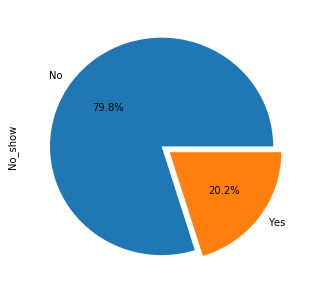

In [20]:
df.No_show.value_counts().plot.pie(figsize=(5,5), explode=(0, .09) , autopct='%.1f%%')
plt.show()

In [21]:
df['No_show'].describe()

count     110521
unique         2
top           No
freq       88205
Name: No_show, dtype: object

<h2> Histogram for some columns</h2>

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1efbfef898>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1efbd81f98>]], dtype=object)

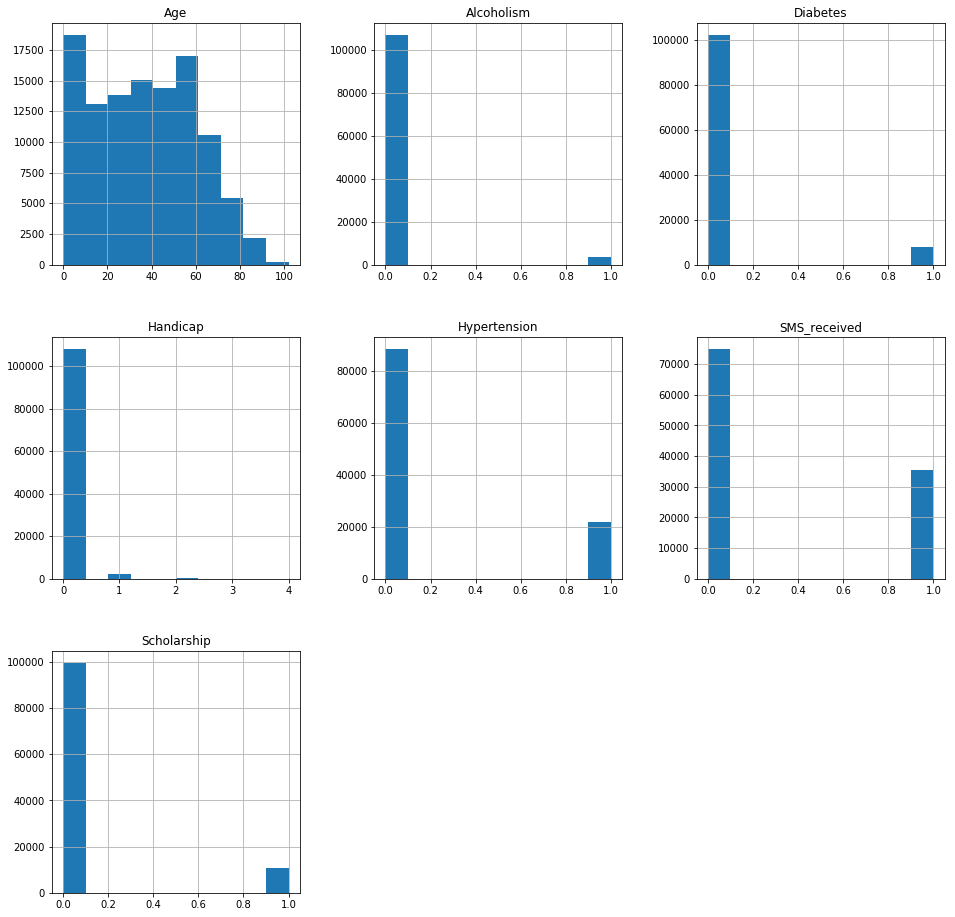

In [22]:
df.hist(figsize =(16,16))

<b>Most of people did not suffer from chronic diseases , alcoholism , diabetes or  handicap </b> <br>

In [23]:
df['Age'].describe()

count    110521.000000
mean         37.085694
std          23.104606
min           0.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         102.000000
Name: Age, dtype: float64

In [24]:
df['Alcoholism'].describe()

count    110521.000000
mean          0.030401
std           0.171690
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Alcoholism, dtype: float64

In [25]:
df['Diabetes'].describe()

count    110521.000000
mean          0.071869
std           0.258272
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Diabetes, dtype: float64

In [26]:
df['Handicap'].describe()

count    110521.000000
mean          0.022213
std           0.161440
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: Handicap, dtype: float64

In [27]:
df['Hypertension'].describe()

count    110521.000000
mean          0.197248
std           0.397923
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Hypertension, dtype: float64

In [28]:
df['SMS_received'].describe()

count    110521.000000
mean          0.321034
std           0.466876
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max           1.000000
Name: SMS_received, dtype: float64

In [29]:
df['Scholarship'].describe()

count    110521.000000
mean          0.098271
std           0.297682
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: Scholarship, dtype: float64

In [30]:
# making two variables to dvide no_show column to Yes or No showing
showed =df['No_show'] == "No"  
not_showed = df['No_show'] == "Yes"

In [31]:
print(f"There is a {showed.sum()} person showing and there is {not_showed.sum()} person did not showing " )

There is a 88205 person showing and there is 22316 person did not showing 


In [61]:
showed_percent = (88205/(88205 + 22316)) *100
not_showed_percent = (22316/(88205 + 22316)) *100 


print("the percent of showing person {:.2f} %\nthe percent of non showing person {:.2f}%".format(showed_percent , not_showed_percent))

the percent of showing person 79.81 %
the percent of non showing person 20.19%


<h1> Analysis some factors of attendance </h1>

<h3> 1- Age Factor </h3>

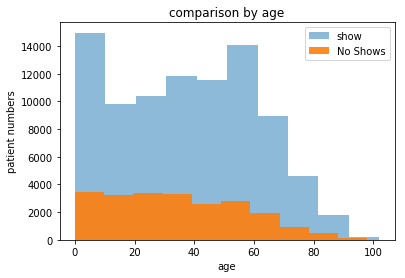

The mean age of showing people in the appointment is 37.79
The mean age of not showed people in the appointment is 34.31


In [121]:
df[showed].Age.plot.hist(alpha =0.5 , bins =10 , label="show")
df[not_showed].Age.plot.hist(alpha =0.9 , bins =10 , label = "not showed" )
plt.title("comparison by age")
plt.xlabel("age")
plt.ylabel("patient numbers")
plt.legend(["show", "No Shows"])
plt.show()
print('The mean age of showing people in the appointment is {:.2f}'.format(df[showed].Age.mean()))
print('The mean age of not showed people in the appointment is {:.2f}'.format(df[not_showed].Age.mean()))

<h3> 2- Neighbourhood Factor </h3>

Text(0,0.5,'Num of patients')

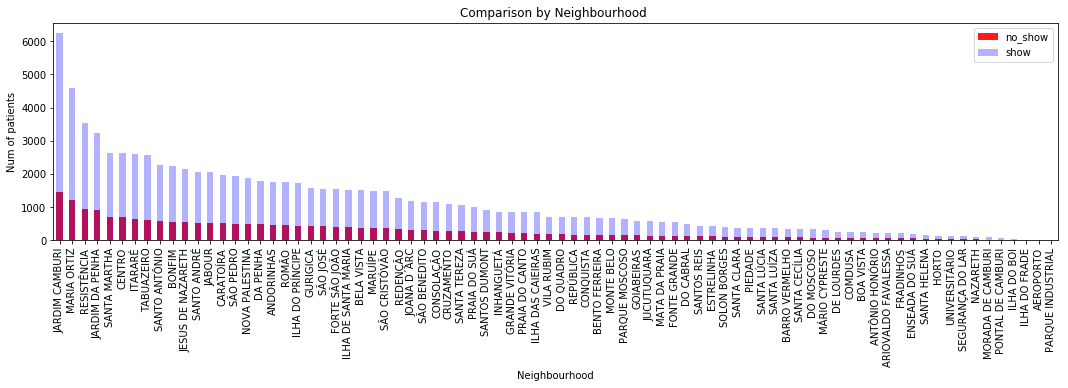

In [122]:
plt.figure(figsize=[18 ,4])
df.Neighbourhood[not_showed].value_counts().plot(kind="bar", label = "no_show" ,color= "red"  , alpha = 0.9)
df.Neighbourhood[showed].value_counts().plot( kind= "bar" , label = "show" ,color="blue" , alpha = 0.3)
plt.legend()
plt.title("Comparison by Neighbourhood ")
plt.xlabel("Neighbourhood")
plt.ylabel("Num of patients")

 Neighbourhood effect on showing

<h3>3- Gender Factor</h3>

Text(0,0.5,'Num of patients')

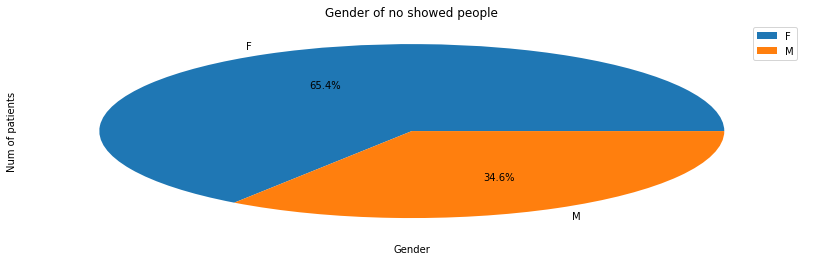

In [123]:
plt.figure(figsize=[14 ,4])
df.Gender[not_showed].value_counts().plot(kind = "pie" , label = "not showed" , autopct='%.1f%%')
plt.legend()
plt.title("Gender of no showed people")
plt.xlabel("Gender")
plt.ylabel("Num of patients")



In [124]:
df.Gender[not_showed].value_counts()

F    14591
M     7725
Name: Gender, dtype: int64

Text(0,0.5,'Num of patients')

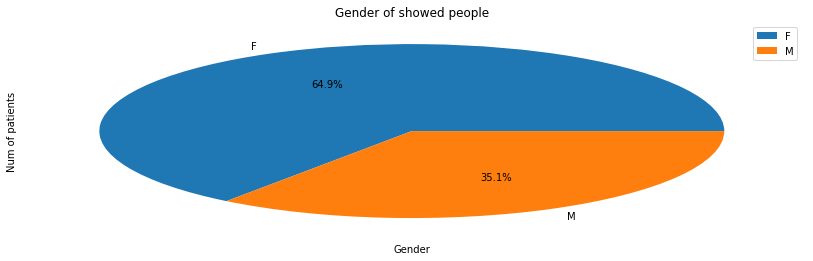

In [125]:
plt.figure(figsize=[14 ,4])
df.Gender[showed].value_counts().plot(kind = "pie" , label = "showed" , autopct='%.1f%%')
plt.legend()
plt.title("Gender of showed people")
plt.xlabel("Gender")
plt.ylabel("Num of patients")

In [126]:
df.Gender[showed].value_counts()

F    57243
M    30962
Name: Gender, dtype: int64

<b> Gender have not a clear reletionship about the showing </b>

<h3>4- SMS Factor </h3>

Text(0,0.5,'Num of patients')

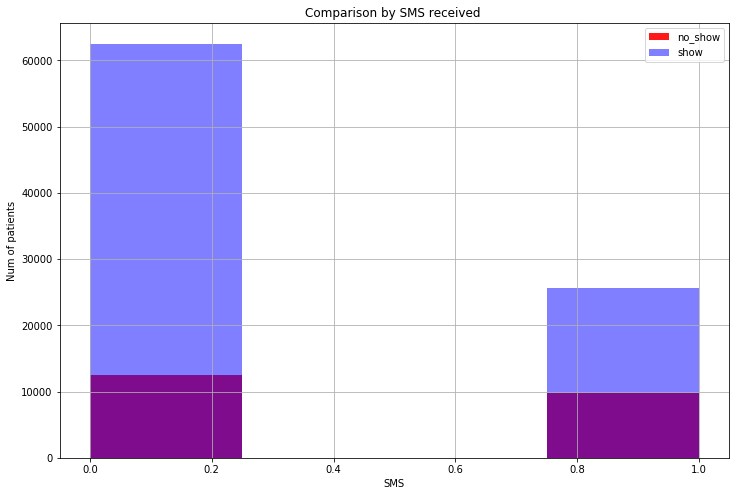

In [127]:
# SMS effect on showing 
plt.figure(figsize=[12 ,8])
df.SMS_received[not_showed].hist(alpha = 0.9 , label = "no_show" , bins = 4 ,color= "red")
df.SMS_received[showed].hist(alpha = 0.5 , label = "show" , bins = 4 , color="blue")
plt.legend()
plt.title("Comparison by SMS received ")
plt.xlabel("SMS")
plt.ylabel("Num of patients")

 In showing patients who did not recieved SMS are greater than who took the SMS <br>

In [128]:
df.SMS_received[showed].value_counts()

0    62508
1    25697
Name: SMS_received, dtype: int64

<a id='conclusions'></a>
## Conclusions

<b>Firstly , The kids from age 1 month to 10 years are the most showing then , the adults from age 42 years to 62 years and from age 62 years to older are the least showing . secondly , Neighbourhood effect on showing strongely and Finally , More people showed without received a SMS </b> <br>


### Limitations

Gender has no relationship about the attending of people


In [92]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0